In [29]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from keras_preprocessing.image import ImageDataGenerator
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

In [30]:
df = pd.read_csv('../../TEZ/MODANISA/prod_details.csv')

C:\Users\IDU\anaconda3\envs\tens_env\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (56,60,75) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [31]:
df = df[['productid','category']]

In [32]:
pd.set_option('display.max_rows', None)
ls =dict(df['category'].value_counts())

In [33]:
len(df)

252082

In [34]:
for key, value in ls.items():
   
    if value < 4554:
        i = df[(df.category == key)].index
        df.drop(i, inplace=True)

In [35]:
len(df)

86289

In [36]:
len( df['category'].unique() ) #classes

10

In [37]:
df.head()

,productid,category
3,1168509,Tunik
5,7981329,Takım
9,7891483,Omuz Çantası
10,7941048,Saat
11,263823,Kap / Pardesü


In [38]:
def append_ext(fn):
    return str(fn)+".jpg"

df["productid"]=df['productid'].apply(append_ext)
df = df.astype('str')

<AxesSubplot:>

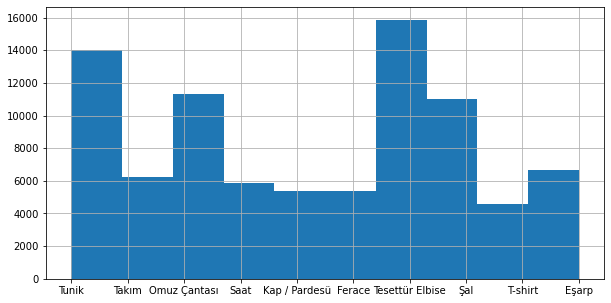

In [39]:
df['category'].hist(figsize=(10,5))

In [40]:
datagen = ImageDataGenerator( rescale= 1./255,
                              validation_split= 0.25)

train_gen = datagen.flow_from_dataframe(dataframe=df, 
                                        directory='C:/Users/IDU/Desktop/dataset',
                                        x_col= 'productid',
                                        y_col= 'category',
                                        class_mode= "categorical",
                                        color_mode= 'rgb',
                                        subset= 'training',
                                        target_size= (200,250),
                                        batch_size=32 )

test_gen = datagen.flow_from_dataframe( dataframe= df, 
                                        directory= 'C:/Users/IDU/Desktop/dataset',
                                        x_col= 'productid',
                                        y_col= 'category',
                                        subset= 'validation',
                                        class_mode= "categorical",
                                        color_mode= 'rgb',
                                        target_size= (200,250),
                                        batch_size= 32)


C:\Users\IDU\anaconda3\envs\tens_env\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 19967 invalid image filename(s) in x_col="productid". These filename(s) will be ignored.
  warnings.warn(


Found 49742 validated image filenames belonging to 10 classes.


C:\Users\IDU\anaconda3\envs\tens_env\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 19967 invalid image filename(s) in x_col="productid". These filename(s) will be ignored.
  warnings.warn(


Found 16580 validated image filenames belonging to 10 classes.


In [41]:
#MODEL

input_shape=(100,135,3)

model = ResNet50( include_top=False , input_shape= input_shape , classes=10)

In [44]:
x =tf.keras.layers.GlobalAveragePooling2D()(model.output)

x = tf.keras.layers.Dense(1024, activation='relu')(x)

y = tf.keras.layers.Dense(10, activation= 'softmax')(x)

model = tf.keras.models.Model(inputs=model.input, outputs=y)

In [47]:
model.compile( optimizer= "adam", loss= "categorical_crossentropy", metrics= ['accuracy'] )

In [ ]:
history= model.fit(train_gen,
          validation_data= test_gen,
          batch_size=32,
          epochs= 100)

Epoch 1/100
1555/1555 [==============================] - 47673s 31s/step - loss: 0.6686 - accuracy: 0.7764 - val_loss: 0.7235 - val_accuracy: 0.7531
Epoch 2/100
1555/1555 [==============================] - 47932s 31s/step - loss: 0.4657 - accuracy: 0.8421 - val_loss: 0.5670 - val_accuracy: 0.8081
Epoch 3/100
1115/1555 [====================>.........] - ETA: 3:31:45 - loss: 0.3916 - accuracy: 0.8662

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [ ]:
!mkdir -p saved_model
model.save('model_10class/my_model3')

In [ ]:
model.summary()